<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
#data = pd.read_csv('')
#data.head()

# Import the data using the file path
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")


In [4]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


In [5]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [6]:
data.shape

(1379, 80)

In [7]:
data.index.is_unique # all the indexes are unique hence no duplicates

True

In [8]:
data["SalePrice"].describe()

count      1379.00000
mean     185479.51124
std       79023.89060
min       35311.00000
25%      134000.00000
50%      167500.00000
75%      217750.00000
max      755000.00000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Total Missing Values')

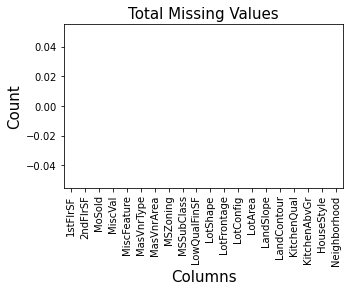

In [9]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (5,3), fontsize = 10)

plt.xlabel("Columns", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Total Missing Values", fontsize = 15)

In [10]:
float_var = data.select_dtypes(include = ['float64', 'int64'])
float_var_corr = float_var.corr()['SalePrice'] [:-1] # [:-1] will remove first row of SalePrice
#displays pearsons correlation coefficient greater than 0.5
top_features = float_var_corr[abs(float_var_corr) > 0.5].sort_values(ascending=False) 
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.787228
GrLivArea       0.708172
GarageCars      0.637095
GarageArea      0.608405
TotalBsmtSF     0.603583
1stFlrSF        0.594935
FullBath        0.556550
TotRmsAbvGrd    0.538309
YearBuilt       0.507584
YearRemodAdd    0.505434
Name: SalePrice, dtype: float64


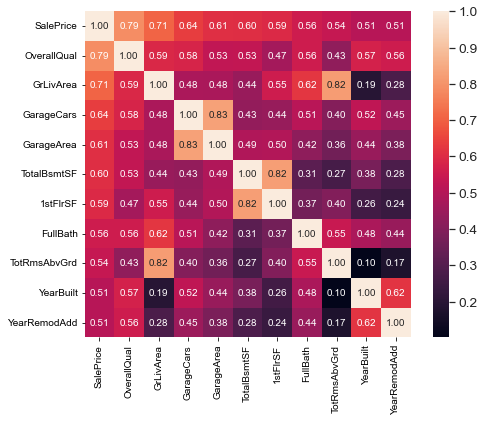

In [11]:
k = 11        # K is the total number of variables for heatmap
# In corr_matrix we need 11 largest variables using K=11 to include SalePrice +10 important var) 
corr_matrix = data.corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
                                                                
cm = np.corrcoef(data[cols].values.T)#create variabl cm of np.corrcoef with value of variable 
                                         #  cols
f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

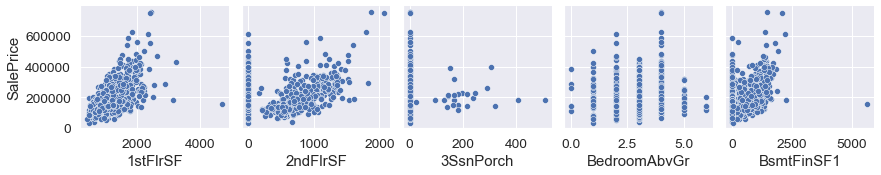

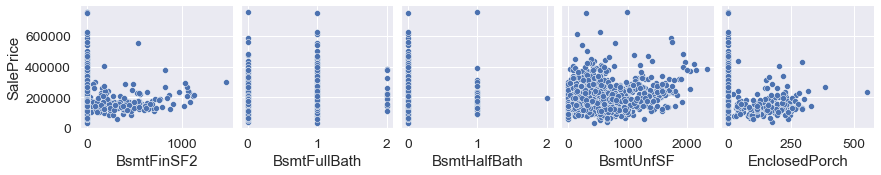

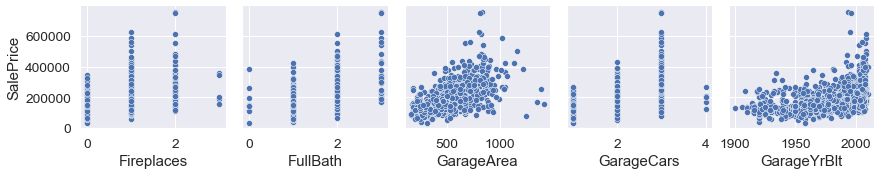

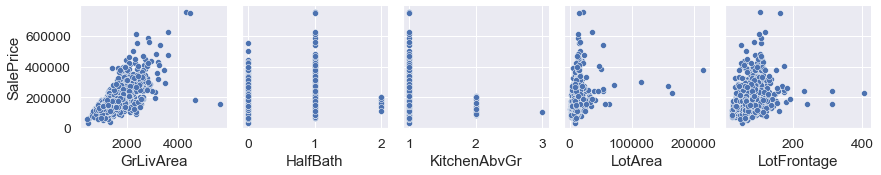

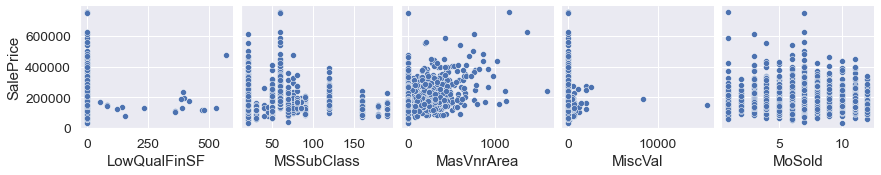

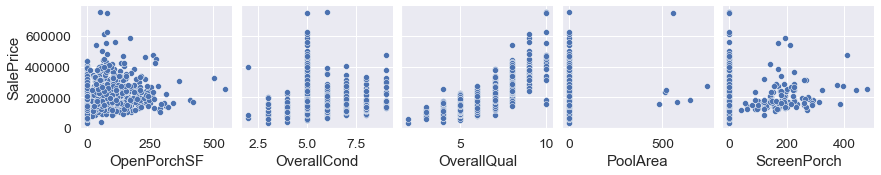

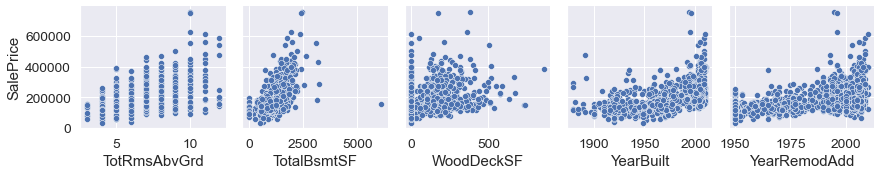

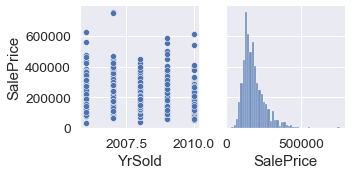

In [12]:
# checking relationship of SalePrice with float and int type data
for i in range(0, len(float_var.columns), 5):
    sns.pairplot(data=float_var,
                x_vars=float_var.columns[i:i+5],
                y_vars=['SalePrice'])

# 1. About the Data

According to the output above, we have 1379 entries, 0 to 1378, as well as 79 features. The "Non-Null Count" column shows the number of non-null entries. If the count is 1379 then there is no missing values for any feature and graph "Total Missing Values" also shows that there is no missing value as there is no plotting. 'SalePrice' is our target or response variable and the rest of the features are our predictor variables.The object types feature are 43, others are float or int type. There is no duplicate row in the data. For object type features we will apply OHC so that these can be used for interpretation.
While looking at the SalePrice, there is a big difference between the minimum value and the 25th percentile. The differnce is bigger while comparing 75th percentile and the maximum value and while looking at the mean value, it appears that our data is not normally distributed (an important assumption for linear regression analysis), so we need to check for normality in the Log Transform section. 
The highest correlation of SalePrice is with OverallQual and total 10 float or int variables are strongly correlated.
The graph of sale price also showing skewed data as it deviate from the normal distribution with appreciable positive skewness and also showing peakedness(kurtosis)

**Removing/checking Multicollinearty through heat map**
If we want to make a call on which of the above variables to retain and which ones to drop(showing high multicollinearity i.e. if two variables are highly correlated with each other and also strongly correlated with SalePrice. Let us zoom into the correlation matrix with a specific variables.
We may choose to remove one of the varibale keeping other with higher correaltion with SalePrice e.g 
GarageCars and GarageArea are highly correlated so we can keep GarageCars, viz more correlated with SalePrice than GarageArea &
GrLivArea and  TotRmsAbvGrd are highly correlated so we can keep GrLivArea, viz more correlated with SalePrice than TotRmsAbvGrd

# 2. Objectives
Main objective is to analyze the data in terms of interpretation testing different models to find out which one appears to be the best by employing the undermentioned steps:

- we do normalization of y SalePrice either by log transformation or by sc we will then compare the described data before and after sc through skewness as well as through distplot

**Note** if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform. Otherwise we need to set skew limit to select the feature variable X.

- we will check for outliers in the strongly correalted features with SalePrice and remove them through log transformation

- we do OHC for object features in X and then we employ different models to find the best R2 value among different models, for best prediction

- we split into test and train set using cross validation technique

- we will use different models like linear regression, polynomial regression, lasso, ridge, elasticnet and will find r2_score and draw the dist plot for each of the model showing actual values versus predictions.

- we will also use ridgeCV, lassoCV and elasticnetCV and finally we will compare the r2_score of each of the model
- we will compare the stats of each of the coefficients of the models

Skewness: 1.935362
Kurtosis: 6.735649

 mean = 185479.51 and std dev = 78995.23



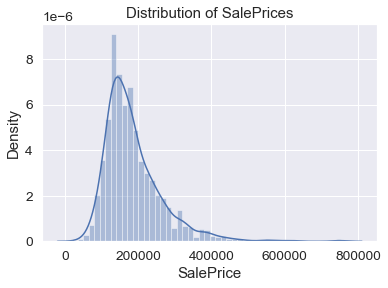

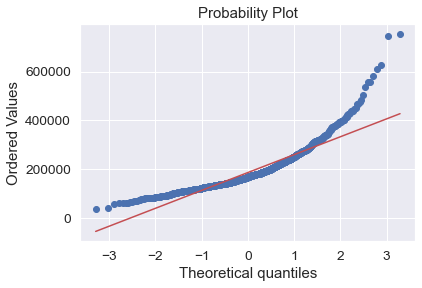

In [13]:
#Analyze Sale price distribution plot histogram and probability plot
sns.distplot(data['SalePrice']).set_title("Distribution of SalePrice")
plt.title('Distribution of SalePrices')

#probability plot by using stats function
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

Above chart shows that distribution of sale price:Deviate from the normal distribution.Have appreciable positive skewness.Showing peakedness(kurtosis) and also showing mean and Std deviation values.To normalize, We apply log transformation

Skewness: 0.290157
Kurtosis: 0.685690

 mean = 12.06 and std dev = 0.38



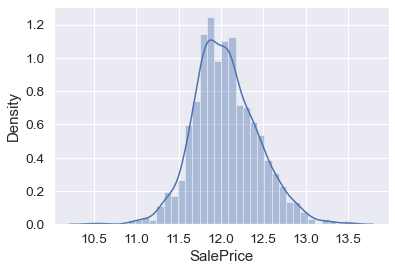

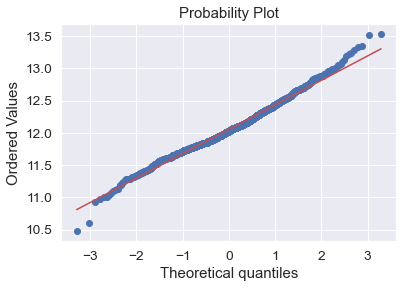

In [14]:
log_transformed = np.log(data['SalePrice']) # we defined variable log_transformed for log on SalePrice
sp_transformed = sns.distplot(log_transformed)
fig = plt.figure()
res = stats.probplot(log_transformed, plot=plt)
print("Skewness: %f" % log_transformed.skew())
print("Kurtosis: %f" % log_transformed.kurt())
(mu, sigma) = norm.fit(log_transformed)
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

The distribution now looks normal and a linear trend in the probability plot is reflecting. The new stats are Skewness: 0.290157, Kurtosis: 0.685690, mean = 12.06 and std dev = 0.38

Now we take feature variables for furtherance. The data consist of 43 object types varaibles as under

In [15]:
mask = data.dtypes == np.object  # we created variable mask from data.dtypes equalto value np.object
cat_cols= data.columns[mask] # we create list of names of catagorial columns by extracting columns  
cat_cols                   # from the dataframe with value of columns as mask
                              #similary we can get float or integer columns list
                            # to see whole list of columns just remove [mask]

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [16]:
# creating a data of ohc by applying ohc in the form  pd.series.get_dummies on object cols of data 
data = pd.get_dummies(data, columns=cat_cols, drop_first=True) 
data.shape   
# drop_first=True to drop originalcatagorical columns to avoid otherwise there will be strong
# multicollinearity due presence of original 43 cat columns along with dummy columns created in place 
# of original catagorical columns

(1379, 252)

In [17]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,0,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,0,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,0,0,1,1,0


data.dtypes.value_counts() without drop_first=True
uint8      258
float64     21
int64       16
dtype: int64

In [18]:
data.dtypes.value_counts() 

uint8      215
float64     21
int64       16
dtype: int64

In [19]:
mask = data.dtypes == np.object  # we created variable mask from data.dtypes equalto value np.object
cat_cols= data.columns[mask] # we create list of names of catagorial columns by extracting columns  
cat_cols

Index([], dtype='object')

After OHC there is no object dtype . Further, the orginal 43 object columns are also removed through drop_first=True. The no of uint8 type increase to 215 whereas float and int64 columns remain the same.

We take copy data_A of the orginial data. data_A will be used 

In [20]:
data_A = data.copy()

In [21]:
X = data_A.drop('SalePrice', axis=1)
y = data_A.SalePrice
X.dtypes.value_counts()

uint8      215
float64     20
int64       16
dtype: int64

In [22]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [23]:
col=X.columns
col

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=251)

In [24]:
# to check skew values on columns of X inside num_cols, define variable skew_vals containg
skew_vals = data[col].skew() 
skew_vals

1stFlrSF             1.390283
2ndFlrSF             0.786109
3SsnPorch           10.007116
BedroomAbvGr        -0.011947
BsmtFinSF1           1.678351
                      ...    
SaleType_New         2.933547
SaleType_Oth        37.134889
SaleType_WD         -2.149196
Street_Pave        -16.534759
Utilities_NoSeWa    37.134889
Length: 251, dtype: float64

In [25]:
skew_limit = 0.75  # we define skew limit for columns, on columns above this limit we do transformation
skew_cols = (skew_vals[skew_vals > skew_limit]   # we filter skew columns with skew above 0.75
             .sort_values(ascending=False)     #ascending= False will sort values largest to smallest
             .to_frame()                       # we transform into pandas data frame
             .rename(columns={0:'Skew'}))      # since its new data frame so default column is called 0
                                              # we rename columns={0:'Skew'} it as Skew

skew_cols  # result will show all columns with skew above 0.75

,Skew
RoofMatl_Membran,37.134889
SaleCondition_AdjLand,37.134889
Heating_OthW,37.134889
MiscFeature_Othr,37.134889
HeatingQC_Po,37.134889
...,...
GarageArea,0.811037
HouseStyle_2Story,0.806052
2ndFlrSF,0.786109
MasVnrType_BrkFace,0.780754


The above result shows that 199 features are highly skewed so either we need to apply log transformation or feature scaling e.g StandardScaler to harmonize the data. we will use StandarScaler method. SalePrice is already logtransformed. 

# 3. Linear Regression Models

In [26]:
def  plot_dis(y,yhat):   # we define a function of dist plot with inputs of y and yhat. whenever we
                        # place values of y and yhat in the function plot_dist it will show plots
    plt.figure()        # as per setting
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Predicted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Price')


    plt.show()
    plt.close()

In [27]:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(shuffle=True, random_state=72018, n_splits=3) # by using KFold shuffle=True with n_splits=3
# KFold with n=3 not only split data into training & test sets in ratio 70:30 but also creates 3 
# different folds of training & test set. The data in training set may over lap but not in test set 

In [28]:
# to see folds and ratio of division among train & test sets
for train_index, test_index in kf.split(X):  # in kf with split X
    print("Train index:", train_index[:10], len(train_index)) # [:10] to show first 10 values for each
    print("Test index:",test_index[:10], len(test_index))      # of train and test splits. 
    print('')                                           #len(test_index) will show total no. of values
                                                        #in train and test splits

Train index: [ 0  2  4  5  6  7  8 10 11 12] 919
Test index: [ 1  3  9 16 17 24 26 27 30 33] 460

Train index: [ 1  3  8  9 10 11 13 14 16 17] 919
Test index: [ 0  2  4  5  6  7 12 15 20 23] 460

Train index: [ 0  1  2  3  4  5  6  7  9 12] 920
Test index: [ 8 10 11 13 14 18 19 21 22 28] 459



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

In [137]:
scores = []

lr = LinearRegression()
s = StandardScaler() # s will be applied only on X not on y but for X_train it will be fit_transform

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred_lr = lr.predict(X_test_s)

    score_lr = r2_score(y_test.values, y_pred_lr) # to check difference between actual y_test values and 
                                            # predicted values from X_test
    scores.append(score_lr)
   

In [138]:
print(scores)
print(" ")
print(np.mean(scores))

[0.8848454445404724, -5.860800226049909e+23, -1.3246492993351238e+21]
 
-1.9580155730144202e+23


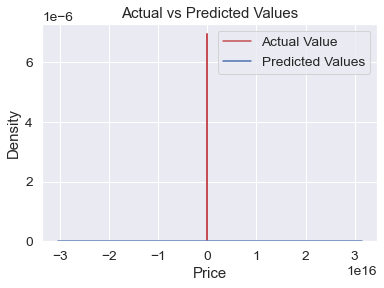

In [139]:
plot_dis(y_test,y_pred_lr)

In [160]:
scores = []
pf=PolynomialFeatures()
lrpoly = LinearRegression()
sc = StandardScaler() # s will be applied only on X not on y but for X_train it will be fit_transform

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',lrpoly)]
    pipe = Pipeline(Input)
    pipe.fit(X_train, y_train) 

In [161]:
pipe.score(X_test, y_test)

0.785369252948413

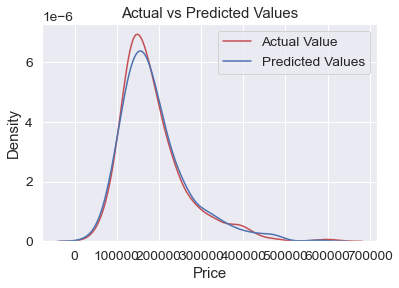

In [142]:
poly_pred=pipe.predict(X_test)
plot_dis(y_test,poly_pred)

In [174]:
coef=lrpoly.coef_
coef

array([250.26159201, 256.4015009 ,  22.90446087, ...,   6.29217111,
         0.        ,   0.        ])

In [193]:
coefficients = pd.DataFrame()
coefficients['LinearPoly']=coef.ravel()
coefficients_poly = coefficients.applymap(abs)
coefficients_poly.describe()  

,LinearPoly
count,31877.000000
mean,45.880431
std,107.067731
min,0.000000
25%,0.000000
50%,8.027023
75%,45.593513
max,2832.497761


In [194]:
(coefficients_poly>0).sum() 

LinearPoly    19402
dtype: int64

In [143]:
scores = []

rr = Ridge()
s = StandardScaler() # s will be applied only on X not on y but for X_train it will be fit_transform

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    rr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred_rr = rr.predict(X_test_s)

    score_rr = r2_score(y_test.values, y_pred_rr) # to check difference between actual y_test values and 
                                            # predicted values from X_test
    scores.append(score_rr)


In [144]:
print(scores)
print(" ")
print(np.mean(scores))

[0.8867842114168606, 0.7250317090150806, 0.53813143161848]
 
0.7166491173501405


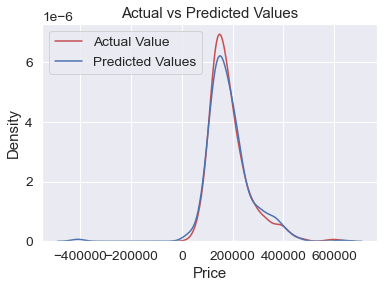

In [145]:
plot_dis(y_test,y_pred_rr)

In [146]:
scores = []

ls = Lasso()
s = StandardScaler() # s will be applied only on X not on y but for X_train it will be fit_transform

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    ls.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred_ls = ls.predict(X_test_s)

    score_ls = r2_score(y_test.values, y_pred_ls) # to check difference between actual y_test values and 
                                            # predicted values from X_test
    scores.append(score_ls)
   

In [147]:
print(scores)
print(" ")
print(np.mean(scores))

[0.8883231606860803, 0.7219941043370787, 0.4665772600189423]
 
0.6922981750140337


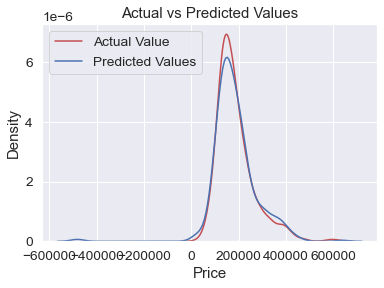

In [148]:
plot_dis(y_test,y_pred_ls)

In [149]:
scores = []

en = ElasticNet()
s = StandardScaler() # s will be applied only on X not on y but for X_train it will be fit_transform

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    en.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred_en = en.predict(X_test_s)

    score_en = r2_score(y_test.values, y_pred_en) # to check difference between actual y_test values and 
                                            # predicted values from X_test
    scores.append(score_en)
   

In [150]:
print(scores)
print(" ")
print(np.mean(scores))

[0.8633318695018757, 0.7761744620393396, 0.8293487686698467]
 
0.822951700070354


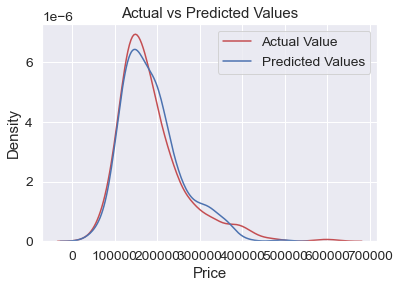

In [151]:
plot_dis(y_test,y_pred_en)

In [190]:
coefficients = pd.DataFrame() # we created a DataFrame() of coefficients

coefficients['LinearRegression'] = lr.coef_.ravel()
coefficients['Ridge'] = rr.coef_.ravel()
coefficients['Lasso'] = ls.coef_.ravel()
coefficients['ElasticNet'] = en.coef_.ravel()
coefficients = coefficients.applymap(abs)
coefficients.describe()  

,LinearRegression,Ridge,Lasso,ElasticNet
count,2.510000e+02,251.000000,251.000000,251.000000
mean,2.878618e+14,3391.240895,3859.960753,1103.105727
std,1.002786e+15,6856.189231,7993.187722,1380.417579
min,0.000000e+00,0.000000,0.000000,0.000000
25%,8.293271e+02,497.579352,562.726978,203.664627
50%,2.092688e+03,1315.722138,1356.669800,557.897321
75%,8.152281e+03,3566.691184,4069.146872,1558.301089
max,6.466547e+15,70302.308459,79140.508405,8736.862664


In [191]:
(coefficients>0).sum() 

LinearRegression    250
Ridge               244
Lasso               240
ElasticNet          244
dtype: int64

In [81]:
from sklearn.linear_model import LassoCV
alphas_l1 = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
lassoCV = LassoCV(alphas=alphas_l1, max_iter=50000, cv=3)
lassoCV=lassoCV.fit(X_train, y_train)
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_R2.round(2))  # Lasso is slower due to higher no of iterations

30.0 0.81


In [82]:
from sklearn.linear_model import RidgeCV
alphas_rr = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
ridgeCV = RidgeCV(alphas=alphas_rr, cv=4)
ridgeCV=ridgeCV.fit(X_train, y_train)
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test))
print(ridgeCV.alpha_.round(1), ridgeCV_R2.round(2))

10.0 0.83


In [83]:
from sklearn.linear_model import ElasticNetCV
l1_ratios = np.linspace(0.1, 0.9, 9)
alphas_en = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]
elasticNetCV = ElasticNetCV(alphas=alphas_en, 
                            l1_ratio=l1_ratios,
                            max_iter=10000).fit(X_train, y_train)
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test))

In [84]:
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_R2.round(2))

0.1 0.9 0.83


In [102]:
R2_vals = [score_lr, score_rr, score_ls, score_en, elasticNetCV_R2, ridgeCV_R2, lassoCV_R2]
labels = ['LinearRegression','Ridge','Lasso','ElasticNet','elasticNetCV', 'ridgeCV', 'lassoCV']
R2_df = pd.Series(R2_vals, index=labels).to_frame()
R2_df.rename(columns={0: 'R2 Score'}, inplace=1) # if we dont rename the column, its heading will be 0
R2_df

,R2 Score
LinearRegression,-1.324649e+21
Ridge,5.381314e-01
Lasso,4.665773e-01
ElasticNet,8.293488e-01
elasticNetCV,8.263752e-01
ridgeCV,8.263784e-01
lassoCV,8.059735e-01


In [103]:
coefficients = pd.DataFrame() # we created a DataFrame() of coefficients

coefficients['LinearRegression'] = lr.coef_.ravel()

coefficients['Ridge'] = rr.coef_.ravel()
coefficients['ridgeCV'] = ridgeCV.coef_.ravel()

coefficients['Lasso'] = ls.coef_.ravel()
coefficients['lassoCV'] = lassoCV.coef_.ravel()

coefficients['ElasticNet'] = en.coef_.ravel()
coefficients['elasticNetCV'] = elasticNetCV.coef_.ravel()


coefficients = coefficients.applymap(abs)
coefficients.describe()  

,LinearRegression,Ridge,ridgeCV,Lasso,lassoCV,ElasticNet,elasticNetCV
count,2.510000e+02,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,2.878618e+14,3391.240895,3956.907815,3859.960753,9401.985415,1103.105727,4079.810665
std,1.002786e+15,6856.189231,4666.135752,7993.187722,32668.797898,1380.417579,4806.754162
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.293271e+02,497.579352,754.945952,562.726978,0.000000,203.664627,781.446451
50%,2.092688e+03,1315.722138,2350.343042,1356.669800,1334.818490,557.897321,2417.812297
75%,8.152281e+03,3566.691184,5396.632449,4069.146872,7826.109271,1558.301089,5591.252132
max,6.466547e+15,70302.308459,26291.982950,79140.508405,313288.312525,8736.862664,27462.911739


In [104]:
(coefficients>0).sum() 

LinearRegression    250
Ridge               244
ridgeCV             244
Lasso               240
lassoCV             171
ElasticNet          244
elasticNetCV        244
dtype: int64

# 4. Insights and key findings
- From above tables we see that min std dev is in ElasticNet and max value in Enet is also lower than other models. Furthermore the difference in 25th, 50th and 75th quartile is also low in Enet. 

- The non zero coefficients are 244 and remaining 251-244 are zero coefficients. Furthermore the number of  coefficients for polynomial regression is above 19402, hence polynomial features created extra ordinary features but converted model into an fitted model as compared to the simple linear regression model. 

- lassoCV has the maximum no of zero coefficients as non zero coefficients or feature variables in lassoCV are 171, very low as compared to all other models, this is because alpha value is very high in lassoCV.

- Comparing the models, while looking at the mean, std, difference among min, 25th quartile, 50th quartile, 75th quartile and max value alongwith the dist plot showing actual versus predicted values and r2_score we see elasticNet is the best model.

# 5. Next Steps


**Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

- The model size may be reduced by taking only those feature variables which are strongly correlated to the SalePrice instead of taking all the feature variables for predictions through different models.

- instead of applying standardScaler on the feature varaibles, we may apply log transformation and any feature variable with negative value will become NAN, shall be filled by mean of the respective values otherwise, these will be initially converted into absolute values then log transfromation will be applied. 

- we may also use GridSearchCV models for auto interpretation of best hyperparameters and best accuracy.

**Being student of machine learning, I always request for suggestions and guidances for my improvement

## Author


[Amir Islam](www.linkedin.com/in/amir-islam-773432269)


| Date (YYYY-MM-DD) | Version | Changed By            | Change Description                   |
| ----------------- | ------- | --------------------- | ------------------------------------ |
| 2023-11-12        | 0.1     | Amir                  | Project submission |
|                |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
